In [2]:
import csv
import pandas as pd

In [3]:
y = 50*2914
print(y)

145700


In [4]:
# define file paths
txt_file = 'relevance_judgments_priorcases.txt'
csv_file = 'relevance_judgments_priorcases.csv'

In [5]:
# Open the input file and the output CSV file
with open(txt_file, 'r') as infile, open(csv_file, 'w', newline='') as outfile:
    # Define CSV writer and write the header row
    writer = csv.writer(outfile)
    writer.writerow(['Query_ID', 'Iteration', 'Document_ID', 'Relevance'])

    # Read through each line of the input file and write to CSV
    for line in infile:
        parts = line.strip().split()
        writer.writerow(parts)

In [6]:
df = pd.read_csv('relevance_judgments_priorcases.csv')
print(df.shape)

df['Query_ID_numeric']= df['Query_ID'].str.extract('(\\d+)').astype(int)
df['Document_ID_numeric'] = df['Document_ID'].str.extract('(\\d+)').astype(int)

df.sort_values(by=['Query_ID_numeric', 'Document_ID_numeric'], inplace=True)
df.reset_index(drop=True, inplace=True)

df

# #df.drop(columns=['Query_ID_numeric'], inplace=True)  # Remove the temporary column if not needed
# #df.drop(columns=['Document_ID_numeric'], inplace=True)  # Remove the temporary column if not needed

#verify it was arranged as i wanted
df.iloc[[0,2913,2914,5827,5828,8741],:]

(145700, 4)


,Query_ID,Iteration,Document_ID,Relevance,Query_ID_numeric,Document_ID_numeric
0,AILA_Q1,Q0,C1,0,1,1
2913,AILA_Q1,Q0,C2914,0,1,2914
2914,AILA_Q2,Q0,C1,0,2,1
5827,AILA_Q2,Q0,C2914,0,2,2914
5828,AILA_Q3,Q0,C1,1,3,1
8741,AILA_Q3,Q0,C2914,0,3,2914


In [7]:
df_relevant = df[df['Relevance'] == 1]
df_relevant.reset_index(drop=True, inplace=True)

df_relevant[['Query_ID', 'Document_ID']] #relevant columns

,Query_ID,Document_ID
0,AILA_Q1,C9
1,AILA_Q1,C14
2,AILA_Q2,C22
3,AILA_Q2,C27
4,AILA_Q3,C1
...,...,...
190,AILA_Q49,C76
191,AILA_Q49,C92
192,AILA_Q49,C174
193,AILA_Q50,C22


In [8]:
len(df_relevant['Document_ID'].unique())


186

In [9]:
# Create DataFrame with unique Document IDs
relevant_df = pd.DataFrame(df_relevant['Document_ID'].unique(), columns=['relevant_186'])

# Add .txt extension to each Document ID
# relevant_df['relevant_186'] = relevant_df['relevant_186'] + '.txt'

# Save to CSV file
relevant_df.to_csv('relevant_186_files.csv', index=False)

# Display first few rows to verify
print("First few rows of the DataFrame:")
print(relevant_df.head())
print(f"\nTotal documents saved: {len(relevant_df)}")

First few rows of the DataFrame:
  relevant_186
0           C9
1          C14
2          C22
3          C27
4           C1

Total documents saved: 186


In [10]:
# Select specific columns and save them to a CSV
df_relevant[['Query_ID', 'Document_ID']].to_csv('queries_with_relevant_casedocs.csv', index=False)

In [11]:
# Get the value counts as a DataFrame
counts_df = df_relevant['Query_ID'].value_counts().reset_index()
counts_df.columns = ['Query_ID', 'Count']

# Extract the numeric part for sorting
counts_df['Numeric_Part'] = counts_df['Query_ID'].str.extract('(\\d+)').astype(int)

# Sort the DataFrame based on the numeric part
sorted_counts_df = counts_df.sort_values(by='Numeric_Part').drop(columns=['Numeric_Part'])

# Reset the index to get a clean result
sorted_counts_df.reset_index(drop=True, inplace=True)

print(sorted_counts_df['Count'].value_counts())
sorted_counts_df

Count
2     14
1     10
3      7
4      6
5      4
6      3
8      1
22     1
10     1
13     1
12     1
9      1
Name: count, dtype: int64


,Query_ID,Count
0,AILA_Q1,2
1,AILA_Q2,2
2,AILA_Q3,1
3,AILA_Q4,1
4,AILA_Q5,5
5,AILA_Q6,4
6,AILA_Q7,1
7,AILA_Q8,3
8,AILA_Q9,2
9,AILA_Q10,3


In [12]:
# Convert both to lists of strings for consistent comparison
a = df.loc[0:2913, 'Document_ID'].astype(str).tolist()
df2 = pd.read_csv('queries_with_relevant_casedocs.csv')
b = df2['Document_ID'].unique().astype(str).tolist()

# Create DataFrame and check matches
a_df = pd.DataFrame(a, columns=['Value'])
a_df['Match'] = a_df['Value'].isin(b).astype(int)

# Verify the result
print("Final DataFrame shape:", a_df.shape)
print("\nFirst few rows:")
print(a_df.head())

# Verify data types
print("\nData types:")
print("Type of Value column:", a_df['Value'].dtype)
print("Number of matches found:", a_df['Match'].sum())

Final DataFrame shape: (2914, 2)

First few rows:
  Value  Match
0    C1      1
1    C2      1
2    C3      1
3    C4      1
4    C5      1

Data types:
Type of Value column: object
Number of matches found: 186


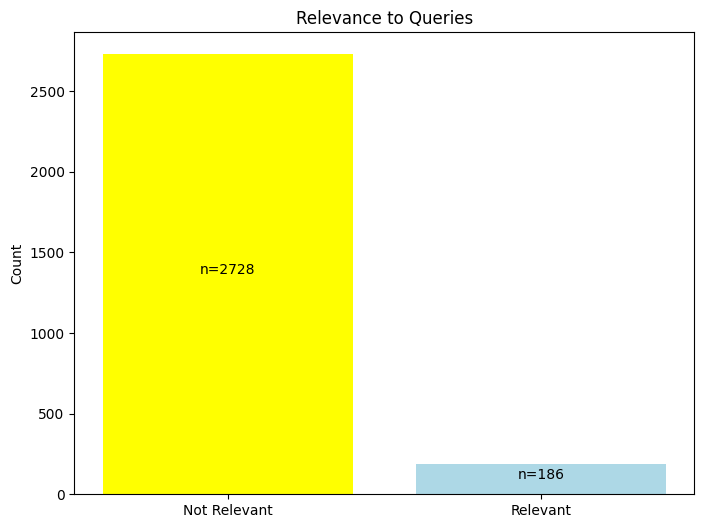

In [13]:
import matplotlib.pyplot as plt

# Count the number of matches and non-matches
match_counts = a_df['Match'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Not Relevant', 'Relevant'], match_counts, color=['yellow', 'lightblue'])

# Customize the chart
plt.title('Relevance to Queries')
plt.ylabel('Count')
plt.text(0, match_counts[0]/2, f'n={match_counts[0]}', ha='center')
plt.text(1, match_counts[1]/2, f'n={match_counts[1]}', ha='center')

# Add grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [14]:
# Get matching documents
matching_docs = a_df[a_df['Match'] == 1]['Value']

# Display results
print(f"Number of matching documents: {len(matching_docs)}")
matching_docs

Number of matching documents: 186


0        C1
1        C2
2        C3
3        C4
4        C5
       ... 
183    C184
184    C185
185    C186
186    C187
187    C188
Name: Value, Length: 186, dtype: object

In [15]:
relevant_186 = pd.read_csv("/Users/temit/Documents/Project/Coding/preprocessing/relevant_186_files.csv")


chosen_50 = pd.read_csv("/Users/temit/Documents/Project/Coding/chosen_50.csv")
chosen_50[["Query_ID", "Document_ID"]].head()

,Query_ID,Document_ID
0,AILA_Q3,C1
1,NaN,C2
2,AILA_Q34,C3
3,AILA_Q29,C4
4,AILA_Q46,C5


In [16]:
# Find values in relevant_186 that are not in chosen_50
non_matching_df = relevant_186[~relevant_186['relevant_186'].isin(chosen_50['Document_ID'])]

# Reset index of the new DataFrame
non_matching_df = non_matching_df.reset_index(drop=True)

# Display results
print(f"Total documents in relevant_186: {len(relevant_186)}")
print(f"Total documents in chosen_50: {len(chosen_50)}")
print(f"Number of non-matching documents: {len(non_matching_df)}")

# Display first few rows of non-matching documents
print("\nFirst few non-matching documents:")
print(non_matching_df.head())

# Optional: Add .txt extension back if needed
non_matching_df['relevant_186'] = non_matching_df['relevant_186'] + '.txt'

# Save to CSV if needed
non_matching_df.to_csv('remaining_136.csv', index=False)

Total documents in relevant_186: 186
Total documents in chosen_50: 50
Number of non-matching documents: 136

First few non-matching documents:
  relevant_186
0           C9
1          C54
2         C121
3         C144
4         C155


In [17]:
import os
import shutil
import pandas as pd

# Read the CSV file
remaining_136 = pd.read_csv('remaining_136.csv')

# Create new directory for the remaining files
output_dir = "remaining_136"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Source directory containing the .txt files
source_dir = "/Users/temit/Documents/Project/Masters Dissertation/AILA_2019_dataset/Object_casedocs"  # Change this to your source directory path

# Counter for successful copies
copied_count = 0

# Iterate through the filenames in remaining_136.csv
for filename in remaining_136['relevant_186']:
    source_file = os.path.join(source_dir, filename)
    dest_file = os.path.join(output_dir, filename)
    
    try:
        if os.path.exists(source_file):
            shutil.copy2(source_file, dest_file)
            copied_count += 1
        else:
            print(f"File not found: {source_file}")
    except Exception as e:
        print(f"Error copying {filename}: {str(e)}")

print(f"\nCopied {copied_count} files to {output_dir}/")
print(f"Expected files: {len(remaining_136)}")


Copied 136 files to remaining_136/
Expected files: 136


In [19]:
hg = pd.read_csv("organised_queries.csv")
hg

,Query_ID,1,2,3,4
0,AILA_Q1,"""I was fired from my bank job because I was ac...","""Can a company refuse to rehire someone after ...",NaN,NaN
1,AILA_Q2,"""I'm a government minister who had to resign a...","""If a judge makes damaging comments about your...",NaN,NaN
2,AILA_Q3,"""I'm being prosecuted for selling contaminated...","""My brother's store was accused of selling adu...",NaN,NaN
3,AILA_Q4,"""My wife filed domestic violence charges again...","""What can someone do if they're accused of dow...",NaN,NaN
4,AILA_Q5,"""My family was attacked while working on our s...","""If someone attacks you on disputed farmland a...",NaN,NaN
5,AILA_Q6,"""What happens if someone gets shot while tryin...","""If a police officer dies while trying to arre...",NaN,NaN
6,AILA_Q7,"""My dad was a government accountant who was co...","""What happens if a government employee is caug...",NaN,NaN
7,AILA_Q8,"""My sister-in-law died by suicide after being ...","""If someone's wife commits suicide after being...",NaN,NaN
8,AILA_Q9,"""My brother killed my son during a family figh...","""If a murder case gets dismissed because the p...",NaN,NaN
9,AILA_Q10,"""If five people are charged with the same crim...","""My friends and I were all convicted of the sa...",NaN,NaN
